# Importing libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

In [3]:
df = pd.read_csv('pakwheels_used_car_data_v02.csv')
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


# Dataset properties

In [4]:
df.shape

(77878, 14)

In [5]:
df.dtypes

addref            int64
city             object
assembly         object
body             object
make             object
model            object
year            float64
engine          float64
transmission     object
fuel             object
color            object
registered       object
mileage           int64
price           float64
dtype: object

In [6]:
df.columns

Index(['addref', 'city', 'assembly', 'body', 'make', 'model', 'year', 'engine',
       'transmission', 'fuel', 'color', 'registered', 'mileage', 'price'],
      dtype='object')

In [7]:
df.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [8]:
df[['mileage', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,77878.0,9.110919e+04,8.927534e+04,1.0,34000.0,80000.0,123456.0,1000000.0
price,77295.0,3.883232e+06,5.759480e+06,110000.0,1450000.0,2700000.0,4500000.0,529000000.0


# Single features exploration

## Cities

In [9]:
top10_cities = df['city'].value_counts().head(10)
top10_cities

city
Lahore        16674
Karachi       14430
Islamabad     11501
Rawalpindi     5448
Peshawar       3689
Faisalabad     3037
Multan         2347
Gujranwala     1999
Sialkot        1328
Sargodha        879
Name: count, dtype: int64

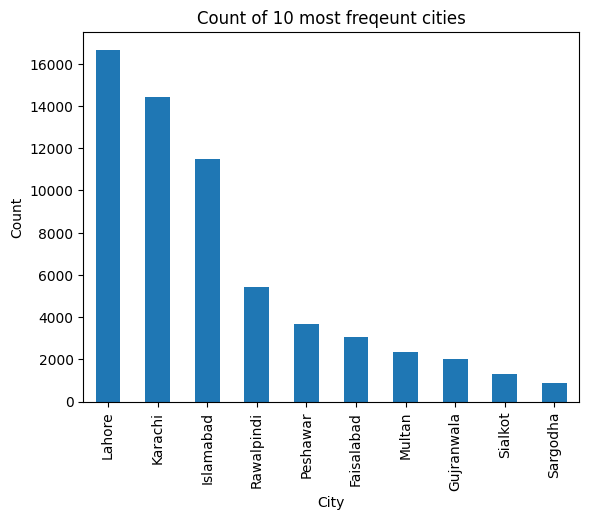

In [10]:
top10_cities.plot(kind = 'bar')
plt.title('Count of 10 most freqeunt cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

## Body type of vehicle

In [11]:
top10_body_type = df['body'].value_counts().head(10)
top10_body_type

body
Sedan            30193
Hatchback        25014
SUV               5087
Crossover         2156
Mini Van          1337
Compact sedan      793
MPV                786
Double Cabin       779
Van                716
Micro Van          539
Name: count, dtype: int64

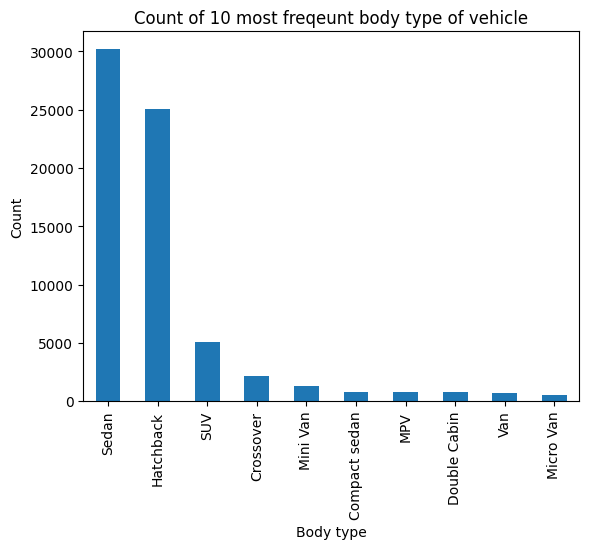

In [12]:
top10_body_type.plot(kind = 'bar')
plt.title('Count of 10 most freqeunt body type of vehicle')
plt.xlabel('Body type')
plt.ylabel('Count')
plt.show()

## Manufacter of vehicle

In [13]:
top10_make = df['make'].value_counts().head(10)
top10_make

make
Toyota        24910
Suzuki        22347
Honda         16428
Daihatsu       3181
KIA            1764
Nissan         1539
Hyundai        1491
Mitsubishi     1101
Changan         942
Mercedes        620
Name: count, dtype: int64

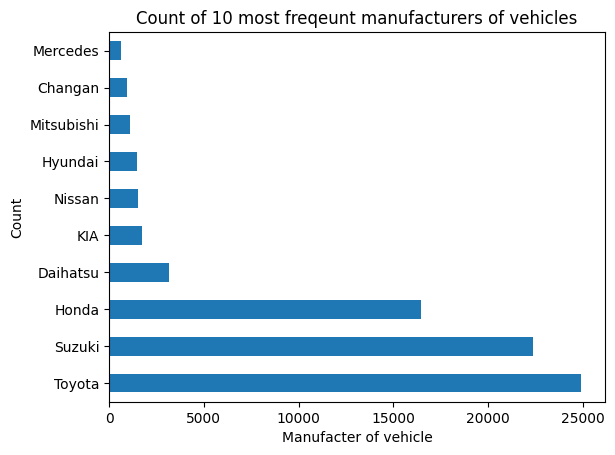

In [14]:
top10_make.plot(kind = 'barh')
plt.title('Count of 10 most freqeunt manufacturers of vehicles')
plt.xlabel('Manufacter of vehicle')
plt.ylabel('Count')
plt.show()

## Year

In [15]:
df = df.dropna(subset= ['year'])
df['year'] = df['year'].astype(int)

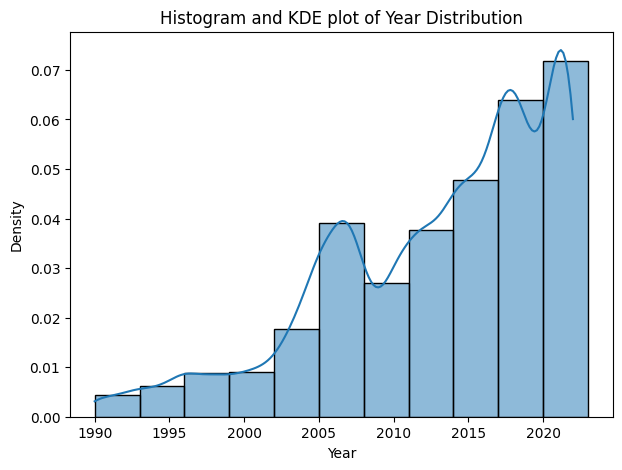

In [16]:
f, ax = plt.subplots(figsize=(7, 5))
sns.histplot(df, x="year", binwidth=3, kde=True, stat="density", ax=ax)
ax.set_xlabel('Year')
ax.set_title('Histogram and KDE plot of Year Distribution')
plt.show()

## Engine volume

In [17]:
df['engine'].isna().sum()

2

In [18]:
df = df.dropna(subset= ['year'])

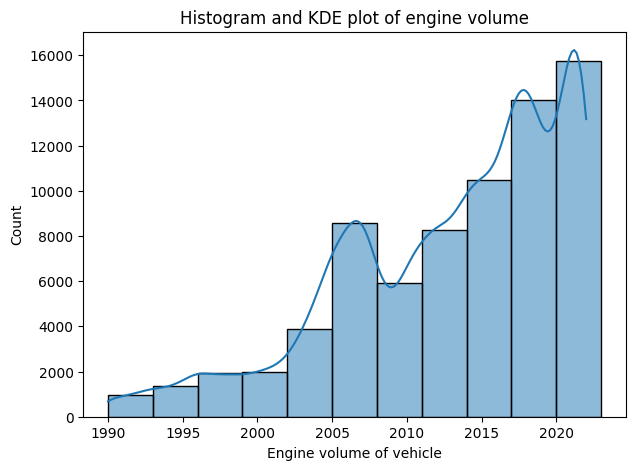

In [19]:
f, ax = plt.subplots(figsize=(7, 5))
sns.histplot(df, x="year", binwidth=3, ax=ax, kde = True)
ax.set_xlabel('Engine volume of vehicle')
ax.set_title('Histogram and KDE plot of engine volume')
plt.show()

## Transmission

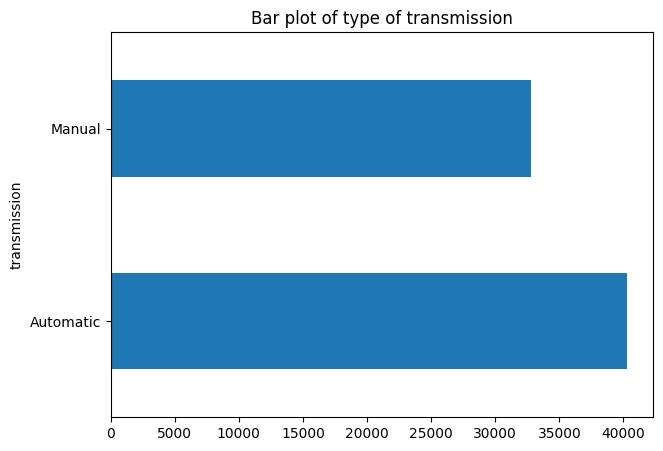

In [20]:
f, ax = plt.subplots(figsize=(7, 5))
transmission = df['transmission'].value_counts()
plt.title('Bar plot of type of transmission')
transmission.plot(kind= 'barh')
plt.show()

## Fuel type

In [21]:
fuel_types = df['fuel'].value_counts()
fuel_types

fuel
Petrol    66780
Diesel     2802
Hybrid     2794
Name: count, dtype: int64

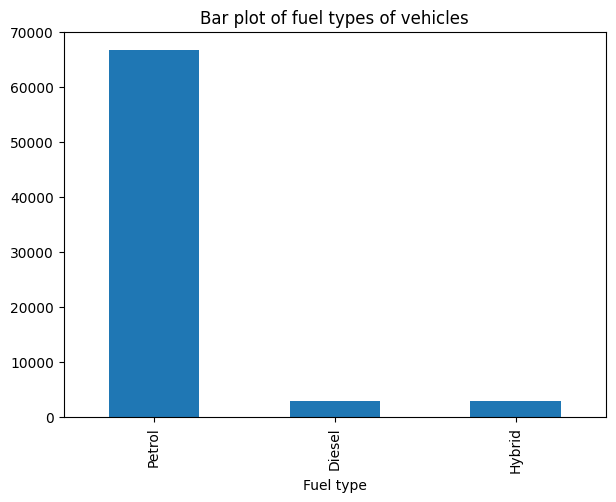

In [22]:
f, ax = plt.subplots(figsize=(7, 5))
fuel_types.plot(kind='bar')
plt.title('Bar plot of fuel types of vehicles')
plt.xlabel('Fuel type')
plt.show()

## Mileage

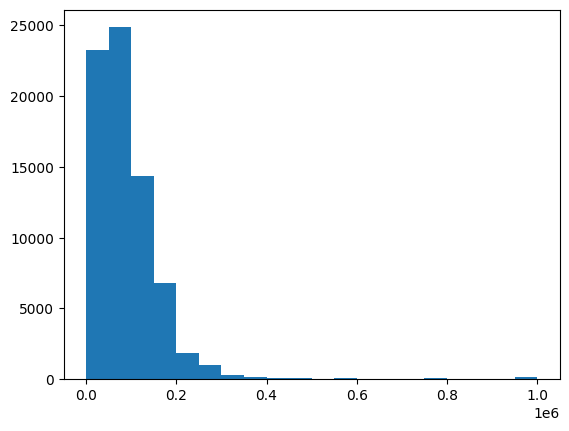

In [23]:
plt.hist(df['mileage'], bins = 20)
plt.show()

## Price

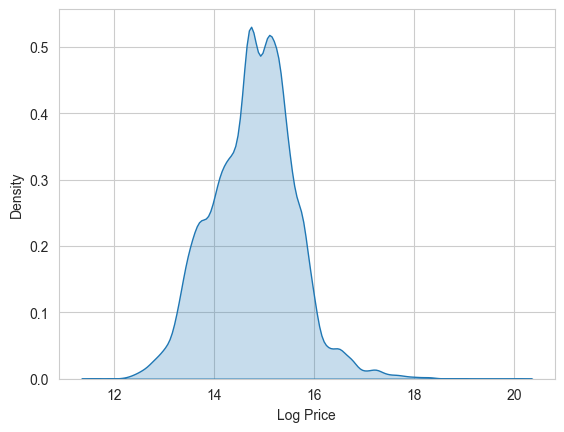

In [24]:
df['price_log'] = np.log(df['price'])
sns.set_style("whitegrid")
sns.kdeplot(df['price_log'], fill=True)
plt.xlabel('Log Price')
plt.show()

# Relation between features

In [50]:
df_numerical = df[['engine', 'year', 'mileage', 'price']]
corr_matrix = df_numerical.corr()
corr_matrix

,engine,year,mileage,price
engine,1.000000,-0.094286,0.051411,0.484014
year,-0.094286,1.000000,-0.417453,0.284638
mileage,0.051411,-0.417453,1.000000,-0.163534
price,0.484014,0.284638,-0.163534,1.000000


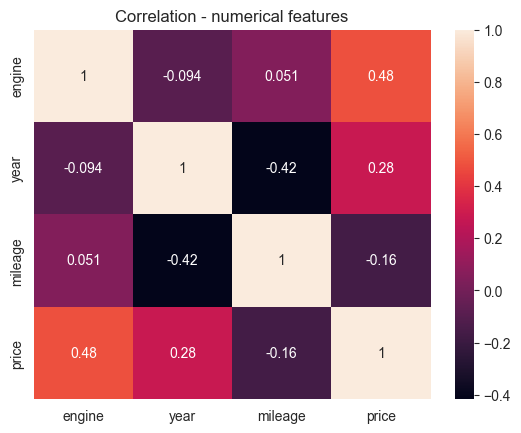

In [51]:
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation - numerical features')
plt.show()

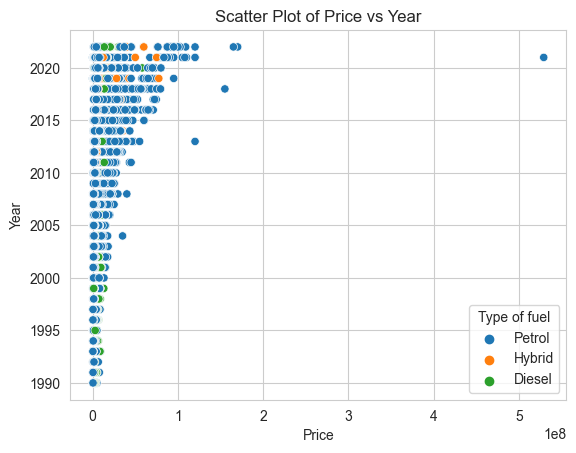

In [52]:
sns.scatterplot(x=df['price'], y=df['year'], hue=df['fuel'])
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Scatter Plot of Price vs Year')
plt.legend(title='Type of fuel')
plt.show()

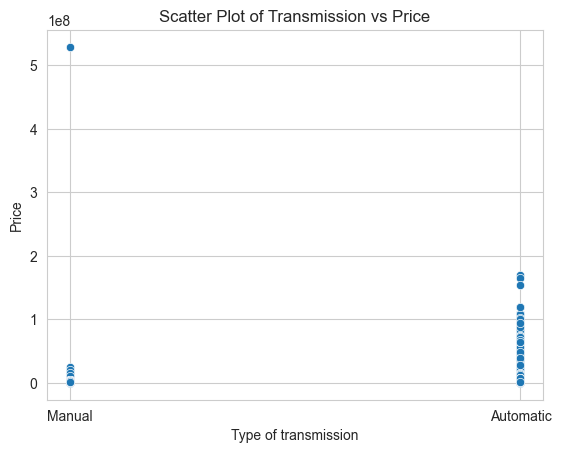

In [53]:
sns.scatterplot(x=df['transmission'], y=df['price'])
plt.xlabel('Type of transmission')
plt.ylabel('Price')
plt.title('Scatter Plot of Transmission vs Price')
plt.show()

In [56]:
df.loc[df['transmission'] == 'Manual']['price'].mean()


1825373.058733791

In [58]:
df.loc[df['transmission'] == 'Automatic']['price'].mean()


5420282.828282828